# Introduction to Monto Carlo Simulation of a S&P 500-like investment

### Starting with 10,000 and investing an additional 10,000 annually, what is the probability that you will have at least 1,000,000 after 30 years of investing in the S&P 500 etf?

#### Youtube Tutorial: https://www.youtube.com/watch?v=A0J0VAHzIxc&feature=emb_logo

In [1]:
# 1. import needed libraries, set plots to display in notebook

import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots
# allows currency formatting
import locale
locale.setlocale(locale.LC_ALL, 'en_CA.UTF-8')


'en_CA.UTF-8'

In [2]:
# 2. A traditional savings calculator approach

pv = 10000
time_horizon = 30
i =.07
additions = 10000

for year in range(time_horizon):
    ending = pv * (1+i) + additions
    print(locale.currency(ending, grouping=True))
    pv = ending




$20,700.00
$32,149.00
$44,399.43
$57,507.39
$71,532.91
$86,540.21
$102,598.03
$119,779.89
$138,164.48
$157,835.99
$178,884.51
$201,406.43
$225,504.88
$251,290.22
$278,880.54
$308,402.17
$339,990.33
$373,789.65
$409,954.92
$448,651.77
$490,057.39
$534,361.41
$581,766.71
$632,490.38
$686,764.70
$744,838.23
$806,976.91
$873,465.29
$944,607.86
$1,020,730.41


In [7]:
# 3. Generating one possible future value based on market history; I will use 9% expected return with 18% volatility

pv = 10000
expected_return = .09
volatility = .18
time_horizon = 30
annual_addition = 10000

print("\tReturn", "\t\tEnding Value".rjust(18))
for year in range(time_horizon):
    market_return = np.random.normal(expected_return, volatility)
    fv = pv * (1 + market_return) + annual_addition
    print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(locale.currency(fv, grouping=True)))
    pv = fv








    
    
    
    
    
    
    
    
    

	Return     		Ending Value
	-0.2048               	$17,952.35
	0.1713               	$31,027.71
	0.025               	$41,803.57
	0.3934               	$68,247.53
	0.1311               	$87,193.78
	0.059               	$102,338.96
	0.0492               	$117,370.59
	0.1776               	$148,211.52
	0.1447               	$179,660.96
	0.3233               	$247,744.05
	0.0131               	$260,984.80
	0.0031               	$271,804.67
	0.101               	$309,265.20
	0.059               	$337,521.01
	0.13               	$391,406.15
	-0.1634               	$337,440.21
	0.1988               	$414,529.00
	0.1478               	$485,804.51
	-0.0644               	$464,501.76
	0.3089               	$617,969.40
	0.1163               	$699,851.96
	0.0967               	$777,561.94
	0.1271               	$886,361.09
	0.2286               	$1,099,006.92
	-0.1747               	$917,010.86
	0.1719               	$1,084,648.77
	0.1578               	$1,265,833.32
	0.1391               	$1,451

In [8]:
# 4. Simulate portfolio ending market values 

sim = DataFrame()
iterations = 5000


for x in range(iterations):
    expected_return = .09
    volatility = .18
    time_horizon = 30
    pv = 10000
    annual_investment = 10000
    stream = []
    for i in range(time_horizon):
        end = round(pv * (1 + np.random.normal(expected_return,volatility)) + annual_investment,2)
        
        stream.append(end)

        pv = end

    
    sim[x] = stream


In [11]:
# 5. Sample first five streams of annual ending values
first_five = list(range(5))
sim[first_five]

,0,1,2,3,4
0,20608.84,25270.36,22524.66,19888.64,24937.49
1,33740.72,35372.69,32873.72,36562.31,41552.59
2,45225.73,44210.06,45421.19,46184.55,51021.79
3,58379.60,61796.20,80086.09,55155.90,86519.77
4,85781.28,70098.26,68538.91,63000.86,108460.91
5,87940.43,82285.84,60522.85,71575.43,110073.63
6,82747.60,102489.51,96294.97,89848.70,133817.78
7,82756.72,123217.12,109410.25,135515.92,182665.42
8,144639.26,136355.22,142602.06,127311.36,214785.48
9,184432.55,169326.84,148948.71,136936.95,286522.75


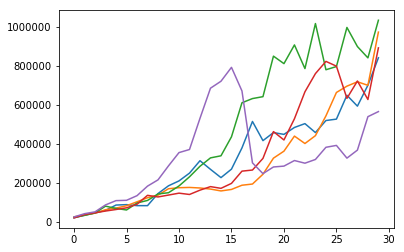

In [12]:
# 6. Plot first five simulated portfolios
plots.plot(sim[first_five])

In [13]:
# 7. Generate summary statistics with numpy functions

print("Count:", len(sim.loc[29]))
print("Mean: ", locale.currency(np.mean(sim.loc[29]),grouping=True))
print("SD: ",locale.currency(np.std(sim.loc[29]),grouping=True))
print("Max: ",locale.currency(np.max(sim.loc[29]), grouping=True))
print("Min: ", locale.currency(np.min(sim.loc[29]), grouping=True))

Count: 5000
Mean:  $1,511,783.96
SD:  $1,207,664.05
Max:  $15,360,616.84
Min:  $113,779.44


In [14]:
# 8. Generating more comprehensive summary statistics with pandas describe function
ending_values = sim.loc[29]
ending_values.describe()


count    5.000000e+03
mean     1.511784e+06
std      1.207785e+06
min      1.137794e+05
25%      7.462566e+05
50%      1.184005e+06
75%      1.867706e+06
max      1.536062e+07
Name: 29, dtype: float64

(array([  63.,  229.,  342.,  526.,  495.,  442.,  392.,  403.,  299.,
         261.,  203.,  182.,  150.,  134.,  107.,   97.,   90.,   73.,
          64.,   44.,   65.,   53.,   31.,   25.,   24.,   22.,   20.,
          21.,   15.,   16.,    4.,    7.,   14.,    7.,    7.,    1.,
           8.,    3.,    5.,    3.,    3.,    4.,    4.,    3.,    2.,
           4.,    2.,    1.,    2.,    2.,    2.,    4.,    1.,    1.,
           2.,    1.,    1.,    1.,    2.,    1.,    0.,    0.,    1.,
           1.,    2.,    0.,    0.,    0.,    1.,    1.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([   113779.44 ,    266247.814,    418716.188,    571184.562,
           723652.936,    876121.31 ,   1028589.684,   1181058.058,
          1333526.432,   1485994.806,   1638463.18 ,   1790931.554,
      

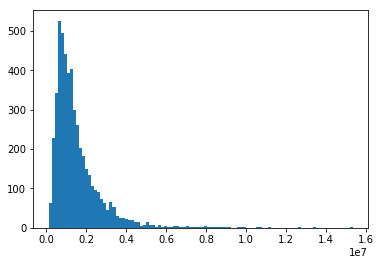

In [17]:
# 9. Get a visualization of the distribution of ending values

plots.hist(ending_values, bins=100)

In [26]:
# 10. Calculate probability of seeing a specific ending_value or less, 
# for example get close to the 75%ile, or $1,000,000

len(ending_values[ending_values<1000000]) / len(ending_values)

0.405

In [22]:
# 11. You can't really get a point estimate, but you can get a range ending values

len(ending_values[(ending_values> 800000) & (ending_values< 1100000)]) /len(ending_values)

0.1776

In [23]:
# 12. You can get a more comprehensive table of percentiles easily using numpy's percentile function

p_tiles = np.percentile(ending_values,[5,10,15,25,75,85,90, 95])
for p in range(len(p_tiles)):
    l = [5,10,15,25,75,85,90,95]
    print( "{}%-ile: ".format(l[p]).rjust(15),"{}".format(locale.currency(p_tiles[p], grouping=True)))


       5%-ile:  $400,786.79
      10%-ile:  $517,436.68
      15%-ile:  $606,444.07
      25%-ile:  $746,256.62
      75%-ile:  $1,867,705.61
      85%-ile:  $2,443,746.84
      90%-ile:  $2,879,132.81
      95%-ile:  $3,657,034.78
